In [1]:
# Import packages
import numpy as np
import os
import pandas as pd
import networkx as nx
import time
from random import sample
import sys
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# edges.csv has 91500 rows, nodes.csv has 23166 rows
edges = pd.read_csv('./data/edges.csv', delimiter=' ')
nodes = pd.read_csv('./data/nodes.csv', delimiter=' ')
nodes = nodes[['network_id', 'node_id']]

#get id's, get each node id's category and concat them together in names df
names = pd.read_csv('./data/ent.subelj_cora_cora.id.csv', delimiter=' ')
cat = pd.read_csv('./data/ent.subelj_cora_cora.class.csv', delimiter=' ')
names['category'] = cat[['category']]

result = pd.merge(nodes, names, on='node_id')
result = result.drop(['node_id'], axis=1)

# split category and sub-category
cat_df = result.copy()
cat_df['category'] = cat_df['category'].astype(str)

for index, row in cat_df.iterrows():
    split = cat_df.loc[index]['category'].split('/')
    cat = split[1]
    cat = cat.replace('_', ' ')
    cat_df.loc[index, 'category'] = cat
    subcat = split[2]
    subcat = subcat.replace('_', ' ')
    cat_df.loc[index, 'sub_cat'] = subcat

In [3]:
'''from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'. 
cat_df['category']= label_encoder.fit_transform(cat_df['category']) 
label_encoder.fit_transform(cat_df['category']) '''

"from sklearn import preprocessing \n\n# label_encoder object knows how to understand word labels. \nlabel_encoder = preprocessing.LabelEncoder() \n# Encode labels in column 'species'. \ncat_df['category']= label_encoder.fit_transform(cat_df['category']) \nlabel_encoder.fit_transform(cat_df['category']) "

In [4]:
edges_tuple = [tuple(x) for x in edges.to_numpy()]
DG = nx.DiGraph()
DG.add_edges_from(edges_tuple)

In [5]:
import networkx as nx

# Print Graph Information
print(f"Type: {'DiGraph' if DG.is_directed() else 'Graph'}")
print(f"Number of nodes: {DG.number_of_nodes()}")
print(f"Number of edges: {DG.number_of_edges()}")
print(f"Average in degree: {sum(dict(DG.in_degree()).values()) / DG.number_of_nodes():.4f}")
print(f"Average out degree: {sum(dict(DG.out_degree()).values()) / DG.number_of_nodes():.4f}")

# Check if graph is directed
print("Is the Graph directed?", DG.is_directed())

# Compute density
print("Graph Density is:", nx.density(DG))

# Compute average clustering coefficient
print("Average Clustering:", nx.average_clustering(DG))


Type: DiGraph
Number of nodes: 23166
Number of edges: 91500
Average in degree: 3.9498
Average out degree: 3.9498
Is the Graph directed? True
Graph Density is: 0.00017050524281260305
Average Clustering: 0.14601503382808564


In [6]:
def dictionary_to_df(df, measure):
    all_df = []
    for node,deg in list(df):
        all_df.append(deg)
    unique = list(set(all_df))

    count = []
    for i in unique:
        x = all_df.count(i)
        count.append(x)

    dfout = pd.DataFrame(list(zip(unique, count)), 
                   columns =[measure, 'Freq']) 
    return dfout 

In [7]:
out_deg = DG.out_degree()
in_deg = DG.in_degree()
out_df = dictionary_to_df(out_deg, 'Degree')
in_df = dictionary_to_df(in_deg, 'Degree')

In [8]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you already have a directed graph (DG)
# Compute in-degree and out-degree distributions    
in_degrees = dict(DG.in_degree())
out_degrees = dict(DG.out_degree())

# Convert to DataFrame
in_df = pd.DataFrame(list(in_degrees.values()), columns=['Degree'])
out_df = pd.DataFrame(list(out_degrees.values()), columns=['Degree'])

# Compute frequency of each degree
in_df = in_df.value_counts().reset_index()
in_df.columns = ['Degree', 'Freq']

out_df = out_df.value_counts().reset_index()
out_df.columns = ['Degree', 'Freq']

# Create subplots
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.1,
                    subplot_titles=("In-Degree Distribution", "Out-Degree Distribution"),
                    specs=[[{"type": "xy"}, {"type": "xy"}]])

# Add in-degree scatter plot
fig.add_trace(
    go.Scatter(x=in_df['Degree'], y=in_df['Freq'], marker_symbol='hexagon2', mode="markers+text",
               marker=dict(size=12, color='rgba(135, 206, 250, 0.7)', 
                           line=dict(width=1, color='DarkSlateGrey'))),
    row=1, col=1)

# Add out-degree scatter plot
fig.add_trace(
    go.Scatter(x=out_df['Degree'], y=out_df['Freq'], marker_symbol='hexagon2', mode="markers+text",
               marker=dict(size=12, color='rgba(135, 206, 250, 0.7)', 
                           line=dict(width=1, color='DarkSlateGrey'))),
    row=1, col=2)

# Update axis labels
fig.update_xaxes(title_text="Degree", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_xaxes(title_text="Degree", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=2)

# Show plot
fig.show()


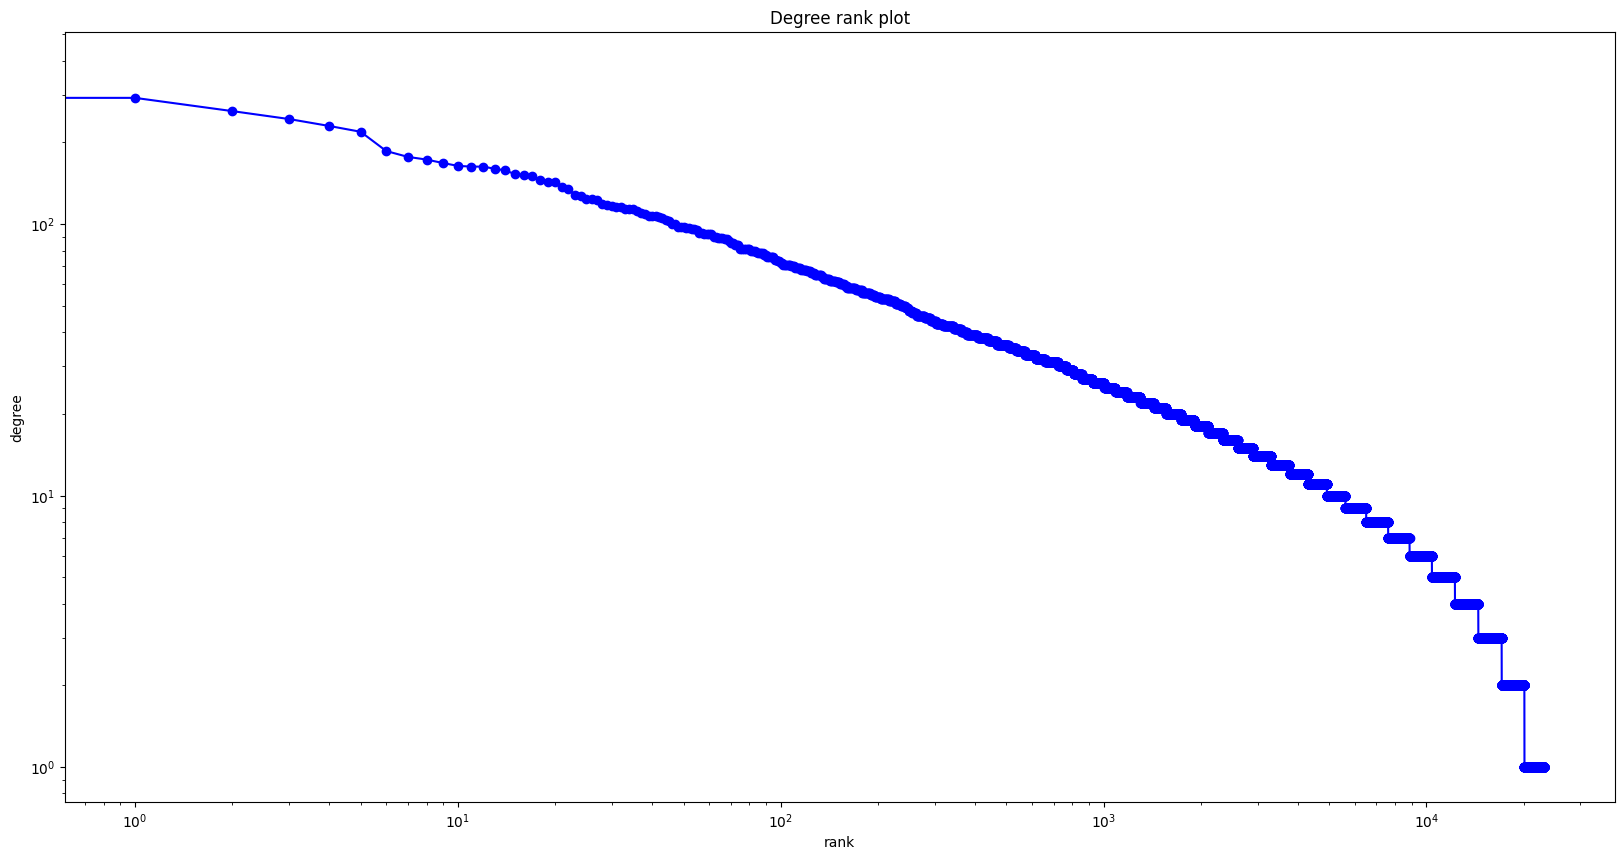

In [9]:
degrees = [DG.degree(n) for n in DG.nodes()]
degree_sequence=sorted(degrees,reverse=True) # degree sequence 
dmax=max(degree_sequence)
plt.figure(figsize=(20,10))
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

plt.show()

In [10]:
degree_sequence=sorted(degrees,reverse=True) # degree sequence
print("Degree histogram")
hist={}
for d in degree_sequence:
    if d in hist:
        hist[d]+=1
    else:
        hist[d]=1
print("degree #nodes")
for d in hist:
    print('%d %d' % (d,hist[d]))

Degree histogram
degree #nodes
379 1
292 1
261 1
244 1
230 1
219 1
186 1
177 1
173 1
168 1
164 1
163 2
160 1
158 1
153 1
152 1
150 1
146 1
143 2
137 1
135 1
128 1
127 1
124 2
123 1
119 1
118 1
117 1
116 2
114 3
112 1
110 1
109 1
107 3
106 1
105 1
104 1
103 1
100 2
98 3
97 2
96 2
95 1
93 2
92 4
90 2
89 3
88 2
87 1
85 2
84 3
81 6
80 3
79 1
78 4
77 2
76 5
74 2
73 2
72 2
71 6
70 3
69 5
68 5
67 3
66 4
65 6
64 2
63 6
62 6
61 5
60 5
59 3
58 10
57 8
56 11
55 6
54 8
53 13
52 10
51 9
50 8
49 5
48 7
47 8
46 15
45 13
44 11
43 16
42 25
41 19
40 15
39 30
38 32
37 28
36 41
35 28
34 35
33 44
32 44
31 65
30 42
29 41
28 50
27 67
26 82
25 82
24 93
23 119
22 133
21 130
20 176
19 174
18 197
17 232
16 262
15 298
14 400
13 466
12 529
11 620
10 696
9 895
8 1104
7 1257
6 1533
5 1856
4 2223
3 2628
2 3011
1 3045


In [11]:
df = pd.DataFrame({'degree':degree_sequence})
df = df.groupby(['degree']).size().reset_index(name='counts')



In [12]:
fig = go.Figure(data=[go.Scatter(
    x=df['degree'], y=df['counts'], mode='markers', marker_symbol='hexagon2', 
    marker=dict(size=12,color='rgba(135, 206, 250, 0.7)', line=dict(width=1, color='DarkSlateGrey')))
])

fig.update_xaxes(title_text="Degree")
fig.update_yaxes(title_text="Frequency")
fig.update_layout(height=500, width=980, title_text="Degree Distribution")

fig.show()

In [13]:
node_degree = [(DG.degree(n), n) for n in DG.nodes()]
node_degree = sorted(node_degree,reverse=True)
node_degree = float(node_degree)

print("degree, node_id")
node_degree[:10]

degree, node_id


[(379, np.int64(18506)),
 (292, np.int64(9814)),
 (261, np.int64(17298)),
 (244, np.int64(8044)),
 (230, np.int64(10557)),
 (219, np.int64(6001)),
 (186, np.int64(22529)),
 (177, np.int64(22092)),
 (173, np.int64(20584)),
 (168, np.int64(5780))]

In [14]:
cat_of_highest_degree = result.loc[result['network_id'] == 18506]
print("Category of node with highest degree is ", cat_of_highest_degree['category'])
print("In degree of node with highest degree (node 18506) is ", DG.in_degree(18506))
print("Out degree of node with highest degree (node 18506) is ", DG.out_degree(18506))

Category of node with highest degree is  18505    /Artificial_Intelligence/Expert_Systems/
Name: category, dtype: object
In degree of node with highest degree (node 18506) is  376
Out degree of node with highest degree (node 18506) is  3


In [15]:
nx.degree_centrality(DG)


{np.int64(20128): 0.00038851715950787827,
 np.int64(6078): 0.00017267429311461257,
 np.int64(22236): 0.001208720051802288,
 np.int64(10436): 0.00025901143967191884,
 np.int64(16776): 0.000302180012950572,
 np.int64(9779): 0.0008633714655730629,
 np.int64(21082): 0.0005611914526224909,
 np.int64(12503): 0.00047485430606518457,
 np.int64(9692): 0.00043168573278653144,
 np.int64(10344): 0.000604360025901144,
 np.int64(8806): 0.00038851715950787827,
 np.int64(7158): 0.0005611914526224909,
 np.int64(5318): 0.00043168573278653144,
 np.int64(5897): 0.001208720051802288,
 np.int64(1701): 0.0005180228793438377,
 np.int64(12079): 0.000302180012950572,
 np.int64(15275): 0.001165551478523635,
 np.int64(10745): 0.000302180012950572,
 np.int64(22237): 0.00047485430606518457,
 np.int64(20015): 0.001813080077703432,
 np.int64(19319): 0.00025901143967191884,
 np.int64(19032): 0.003971508741636089,
 np.int64(11750): 0.00038851715950787827,
 np.int64(1152): 0.0010360457586876754,
 np.int64(2341): 0.00017

In [16]:
bet = nx.betweenness_centrality(DG)
betw_df = dictionary_to_df(bet.items(), 'Betweenness')
betw_df['Freq'] = np.log10(betw_df['Freq'] + 1)
fig = px.scatter(betw_df, x="Betweenness", y="Freq")
fig.update_yaxes(title_text="Log Frequency")
fig.update_layout(height=500, width=700,showlegend=False, title='Betweenness Distribution')
fig.show()

In [17]:
unique_cat = cat_df.category.unique()
degrees_df = pd.DataFrame(columns=['network_id','out_degree', 'in_degree'])
for category in unique_cat:
    #get list of all nodes in category
    cat_nodes = cat_df.copy()
    cat_nodes = cat_nodes.loc[cat_nodes['category'] == category]
    idlist = cat_nodes['network_id']
    #only keep edges that are withhin the category
    cat_edges = edges.copy()
    cat_edges = cat_edges[cat_edges['cites'].isin(idlist)]
    cat_edges = cat_edges[cat_edges['cited'].isin(idlist)]
    #Create the graph
    cat_edges_tuple = [tuple(x) for x in cat_edges.to_numpy()]
    cat_DG = nx.DiGraph()
    cat_DG.add_edges_from(cat_edges_tuple)
    #Calculate in and out degree
    cat_outdeg = cat_DG.out_degree()
    cat_indeg = cat_DG.in_degree()
    final_out = pd.DataFrame(cat_outdeg, columns=['network_id', 'out_degree'])
    final_in = pd.DataFrame(cat_indeg, columns=['network_id', 'in_degree'])
    #Normalize the degree based on number of articles
    final_out['out_degree'] = final_out.out_degree.div(final_out.shape[0])
    final_in['in_degree'] = final_in.in_degree.div(final_in.shape[0])
    final = pd.merge(final_out, final_in, on='network_id')
    degrees_df = pd.concat([degrees_df, final],ignore_index=True)

degrees_df = degrees_df.sort_values(by=['in_degree'], ascending=False)
degrees_df = pd.merge(degrees_df, cat_df, on='network_id')
degrees_df

C:\Users\HP\AppData\Local\Temp\ipykernel_18916\32420575.py:25: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,network_id,out_degree,in_degree,category,sub_cat
0,11096,0.000000,0.144676,Encryption and Compression,Encryption
1,14889,0.000000,0.092074,Networking,Protocols
2,6317,0.001157,0.084491,Encryption and Compression,Encryption
3,14764,0.002188,0.076586,Information Retrieval,Filtering
4,8818,0.003203,0.076061,Networking,Routing
...,...,...,...,...,...
21356,17139,0.002188,0.000000,Information Retrieval,Retrieval
21357,12019,0.002188,0.000000,Information Retrieval,Retrieval
21358,354,0.002188,0.000000,Information Retrieval,Retrieval
21359,14796,0.002188,0.000000,Information Retrieval,Retrieval


C:\Users\HP\AppData\Local\Temp\ipykernel_18916\392131806.py:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



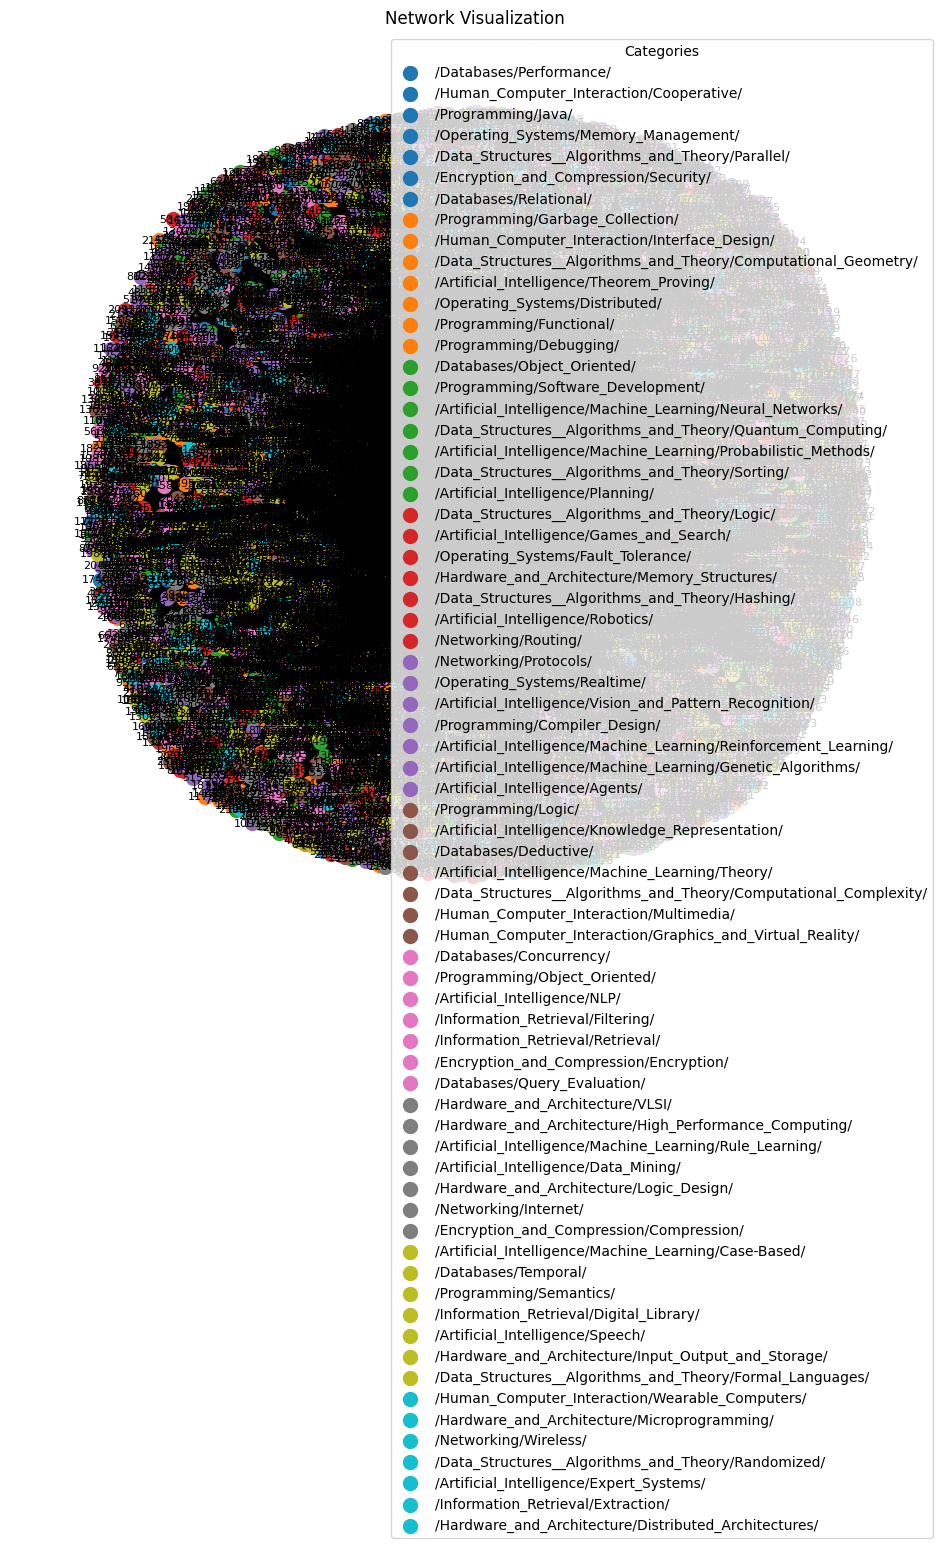

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Assuming DG is your directed graph and result contains the node categories
# Create a color map based on categories
color_map = {}
categories = result['category'].unique()
colors = plt.cm.get_cmap('tab10', len(categories))

for idx, category in enumerate(categories):
    color_map[category] = colors(idx)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(DG)  # Position of nodes

# Draw nodes with different colors based on category
for category in categories:
    nodes_in_category = result[result['category'] == category]['network_id']
    nx.draw_networkx_nodes(DG, pos, nodelist=nodes_in_category, 
                             node_color=color_map[category], label=category, 
                             node_size=100)

# Draw edges
nx.draw_networkx_edges(DG, pos, arrowstyle='-|>', arrowsize=10, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(DG, pos, font_size=8)

# Add legend
plt.legend(title="Categories", loc="upper right")
plt.title("Network Visualization")
plt.axis('off')  # Turn off the axis
plt.show()

In [20]:
# Aggregate in-degree centrality per sub-category
subcat_degrees = degrees_df.groupby('sub_cat').agg({'in_degree': 'sum'}).reset_index()
subcat_degrees = subcat_degrees.sort_values(by='in_degree', ascending=False).head(10)

# Create a bar chart using Plotly
fig = px.bar(
    subcat_degrees, 
    x='sub_cat', 
    y='in_degree', 
    text='in_degree', 
    title="Top 10 Most Cited Sub-Categories",
    labels={'sub_cat': 'Sub-Category', 'in_degree': 'Total In-Degree'},
    color='in_degree',
    color_continuous_scale='Blues'
)

# Update layout for better readability
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Total In-Degree Centrality",
    xaxis_tickangle=-45,
    height=600,
    width=900
)

# Show the plot
fig.show()


In [21]:
# Group by sub-category and sum the in-degrees
top_subcategories = degrees_df.groupby('sub_cat')['in_degree'].sum().reset_index()

# Sort to find the most central sub-category
top_subcategories = top_subcategories.sort_values(by='in_degree', ascending=False)

# Display the top 10 most central sub-categories
print(top_subcategories.head(10))



                         sub_cat  in_degree
33             Memory Management   2.190717
42                     Protocols   1.792634
13                    Encryption   1.549769
32              Machine Learning   1.530683
38               Object Oriented   1.492217
48                     Retrieval   1.439825
11                   Distributed   1.437500
22  Graphics and Virtual Reality   1.320687
1                Compiler Design   1.036989
31                  Logic Design   0.809961


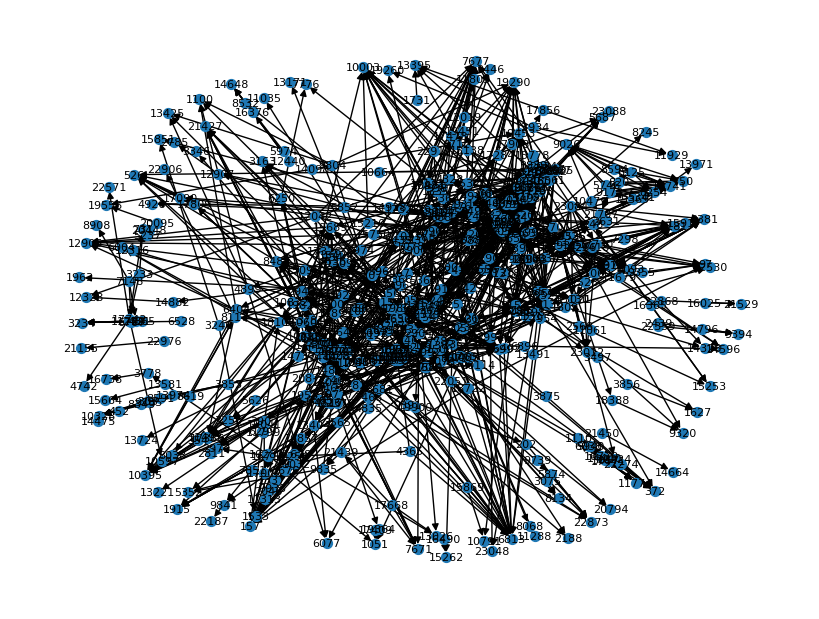

In [23]:
plt.figure(figsize=(8,6))
nx.draw(cat_DG, with_labels=True, node_size=50, font_size=8)
plt.show()

In [24]:
# Group by sub-category and compute mean in-degree
subcat_centrality = (
    degrees_df.groupby(['sub_cat', 'category'])
    .agg({'in_degree': 'mean', 'network_id': 'count'})
    .reset_index()
    .rename(columns={'network_id': 'count', 'in_degree': 'mean_in_degree'})
    .sort_values('mean_in_degree', ascending=False)
)

# Display top results (like your table)
print(subcat_centrality.head(10))

            sub_cat                    category  mean_in_degree  count
17        Filtering       Information Retrieval        0.008299     53
15       Extraction       Information Retrieval        0.005953     68
50        Retrieval       Information Retrieval        0.005714    252
9         Deductive                   Databases        0.004414    128
49       Relational                   Databases        0.004079    120
60             VLSI   Hardware and Architecture        0.003712    197
10  Digital Library       Information Retrieval        0.003439     84
13       Encryption  Encryption and Compression        0.003436    451
39  Object Oriented                   Databases        0.003186    289
44        Protocols                  Networking        0.003080    582
